In [27]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization,MaxPool2D
import tensorflow as tf

In [5]:
TRAIN_DIR = 'Parasitized'
TEST_DIR = 'Uninfected'

IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

In [127]:
import os

path ='\Parasitized\*.png'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(r'C:\Users\asus\ML\ML_Basics\Deep_learning\Malaria_Medical\cell-images-for-detecting-malaria\cell_images\Parasitized'):
    for file in f:
        if '.png' in file:
            files.append((file))


import os

#path ='\Uninfected\*.png'

filesu = []
# r=root, d=directories, f = files
for r, d, f in os.walk(r'C:\Users\asus\ML\ML_Basics\Deep_learning\Malaria_Medical\cell-images-for-detecting-malaria\cell_images\Uninfected'):
    for file in f:
        if '.png' in file:
            filesu.append((file))


TargetP =['Parasitized']*len(files)

TargetU =['Uninfected']*len(filesu)

files.extend(filesu)
TargetP.extend(TargetU)

Mal = {
    'Location':files,
    'Target':TargetP
}
df = pd.DataFrame(Mal)

In [126]:
import os 
  
# Function to rename multiple files 
def rename(): 
    i = 0
      
    for filename in os.listdir("Uninfected"): 
            dst ="Uninfected."+str(i) +".png"
            src ='Uninfected/'+ filename 
            dst ="Uninfected/"+ dst 
            os.rename(src,dst) 
            
            i += 1
        
rename()

import os 
  
# Function to rename multiple files 
def rename(): 
    i = 0
      
    for filename in os.listdir("Parasitized"): 
            dst ="Parasitized."+str(i) +".png"
            src ='Parasitized/'+ filename 
            dst ="Parasitized/"+ dst 
            os.rename(src,dst) 
            
            i += 1
        
rename()

# Start

In [6]:
import os
filenames = os.listdir("BT")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Parasitized':
        categories.append('1')
    else:
        categories.append('0')

        
        
df = pd.DataFrame({
    'filename': filenames,
    'category': categories,
    
})

In [7]:
df.head()

,category,filename
0,1,Parasitized.0.png
1,1,Parasitized.1.png
2,1,Parasitized.10.png
3,1,Parasitized.100.png
4,1,Parasitized.1000.png


In [8]:
from sklearn.utils import shuffle
df = shuffle(df)

In [9]:
df.head()

,category,filename
23688,0,Uninfected.6516.png
6887,1,Parasitized.3796.png
18864,0,Uninfected.2174.png
14090,0,Uninfected.10277.png
17782,0,Uninfected.1360.png


In [10]:
df.shape

(27557, 2)

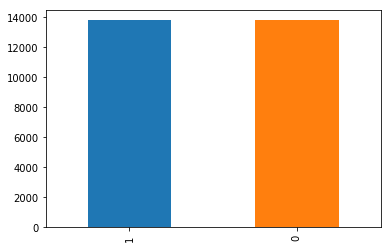

In [11]:
df['category'].value_counts().plot.bar()

In [12]:
seed = 128
rng = np.random.RandomState(seed)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


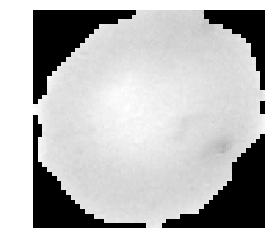

In [13]:
from scipy.misc import imread
import matplotlib.pyplot as pylab
img_name = rng.choice(df.loc[df['category'] == '0'].filename)
filepath = os.path.join('BT',  img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


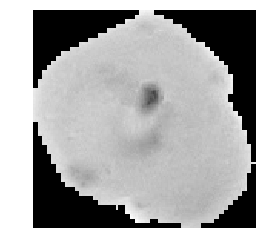

In [14]:
from scipy.misc import imread
import matplotlib.pyplot as pylab
img_name = rng.choice(df.loc[df['category'] == '1'].filename)
filepath = os.path.join('BT',  img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [15]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

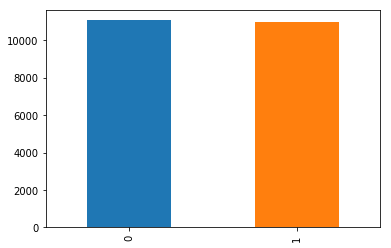

In [16]:
train_df['category'].value_counts().plot.bar()

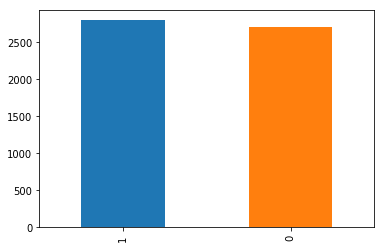

In [17]:
validate_df['category'].value_counts().plot.bar()

In [18]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [188]:
from keras.preprocessing.image import ImageDataGenerator, load_img
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


In [189]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../BT/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 0 images belonging to 0 classes.


In [194]:
train_df.head()

,category,filename
0,1,Parasitized.6465.png
1,0,Uninfected.9547.png
2,1,Parasitized.6972.png
3,0,Uninfected.8921.png
4,1,Parasitized.12634.png


In [20]:

temp = []
size=(128,128)
for img_name in train_df.filename:
    image_path = os.path.join('BT', img_name)
    img = imread(image_path, flatten=True)
    img.resize(size)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)



C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [21]:
temp = []
for img_name in validate_df.filename:
    image_path = os.path.join('BT', img_name)
    img = imread(image_path, flatten=True)
    img.resize(size)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)



C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [22]:
train_x.shape

(22045, 128, 128)

In [23]:
test_x.shape

(5512, 128, 128)

In [24]:
train_y = train_df.category
test_y = validate_df.category

In [25]:
# Reshaping the array to 4-dims so that it can work with the Keras API
train_x = train_x.reshape(train_x.shape[0], 128, 128, 1)
test_x = test_x.reshape(test_x.shape[0], 128, 128, 1)
input_shape = (128, 128, 1)
# Making sure that the values are float so that we can get decimal points after division
train_x =train_x.astype('float32')
test_x = test_x.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
train_x /= 255
test_x /= 255
print('x_train shape:', train_x.shape)
print('Number of images in x_train', train_x.shape[0])
print('Number of images in x_test', test_x.shape[0])


x_train shape: (22045, 128, 128, 1)
Number of images in x_train 22045
Number of images in x_test 5512


# MEDICAL DOMAIN THESIS

In [28]:
# Importing the required Keras modules containing model and layers

from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
# Creating a Sequential Model and adding the layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', input_shape=(128, 128,1)) , 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='tanh'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x, train_y,batch_size =10,validation_split =0.20,  epochs=10,shuffle=True)



Train on 17636 samples, validate on 4409 samples
Epoch 1/10
17636/17636 [==============================] - 808s 46ms/sample - loss: 0.8523 - accuracy: 0.5184 - val_loss: 0.8010 - val_accuracy: 0.5174
Epoch 2/10
17636/17636 [==============================] - 817s 46ms/sample - loss: 0.6932 - accuracy: 0.5417 - val_loss: 0.7115 - val_accuracy: 0.4981
Epoch 3/10
17636/17636 [==============================] - 978s 55ms/sample - loss: 0.6860 - accuracy: 0.5532 - val_loss: 0.7260 - val_accuracy: 0.5321
Epoch 4/10
17636/17636 [==============================] - 920s 52ms/sample - loss: 0.6873 - accuracy: 0.5532 - val_loss: 0.8234 - val_accuracy: 0.5382
Epoch 5/10
17636/17636 [==============================] - 779s 44ms/sample - loss: 0.6832 - accuracy: 0.5597 - val_loss: 0.7973 - val_accuracy: 0.5487
Epoch 6/10
17636/17636 [==============================] - 768s 44ms/sample - loss: 0.6766 - accuracy: 0.5725 - val_loss: 0.7976 - val_accuracy: 0.6022
Epoch 7/10
17636/17636 [=====================

In [31]:
model.evaluate(test_x, test_y)

5512/5512 [==============================] - 19s 3ms/sample - loss: 0.6639 - accuracy: 0.6094


[0.6639057739552635, 0.60939765]

In [50]:
test_y = test_y.astype('int')
test_y.dtype

dtype('int32')

In [40]:
p=[]
for i in range (0,len(test_x)):
    #plt.imshow(xt[i].reshape(28, 28),cmap='Greys')
    predio = model.predict(test_x[i].reshape(1, 128,128, 1))
    p.append(predio.argmax())

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_y, p))
from sklearn.metrics import accuracy_score
accuracy_score(test_y, p)

              precision    recall  f1-score   support

           0       0.65      0.45      0.53      2713
           1       0.59      0.77      0.67      2799
           3       0.00      0.00      0.00         0

   micro avg       0.61      0.61      0.61      5512
   macro avg       0.41      0.40      0.40      5512
weighted avg       0.62      0.61      0.60      5512



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6093976777939042

In [32]:
model.save('CNN_mUL-layer.h5')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      160       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 126, 126, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 63504)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4064320   
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 64)                2

### Early Stop

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

### Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [206]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
batch_normalization_v2_2 (Ba (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_v2_3 (Ba (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [ ]:


model.fit(train_x, train_y,batch_size =10,validation_split =0.20,  epochs=10,shuffle=True)


Train on 17636 samples, validate on 4409 samples
Epoch 1/10
17636/17636 [==============================] - 3376s 191ms/sample - loss: 0.7531 - accuracy: 0.5964 - val_loss: 0.7441 - val_accuracy: 0.5219
Epoch 2/10
17636/17636 [==============================] - 2923s 166ms/sample - loss: 0.5098 - accuracy: 0.7509 - val_loss: 0.4806 - val_accuracy: 0.7795
Epoch 3/10
17636/17636 [==============================] - 2420s 137ms/sample - loss: 0.4005 - accuracy: 0.8315 - val_loss: 0.5211 - val_accuracy: 0.7984
Epoch 4/10
17636/17636 [==============================] - 3010s 171ms/sample - loss: 0.3568 - accuracy: 0.8535 - val_loss: 0.3874 - val_accuracy: 0.8401
Epoch 5/10
17636/17636 [==============================] - 2745s 156ms/sample - loss: 0.3406 - accuracy: 0.8657 - val_loss: 0.2764 - val_accuracy: 0.8934
Epoch 6/10
17636/17636 [==============================] - 2590s 147ms/sample - loss: 0.3360 - accuracy: 0.8692 - val_loss: 0.2996 - val_accuracy: 0.8902
Epoch 7/10
17636/17636 [=========